In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")



In [2]:
df=pd.read_csv("../data/new_data.csv")

In [3]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,2,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,3,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,3,0.0,2,0


In [4]:
# نفترض إن X فيه الأعمدة الرقمية
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
X =df[num_cols]

# 1. Standardize البيانات قبل الـ PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [5]:
# 3. Visualize explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", np.cumsum(explained_variance))


Explained Variance Ratio: [0.33354293 0.19825694 0.1820555  0.16601584 0.12012878]
Cumulative Variance: [0.33354293 0.53179987 0.71385538 0.87987122 1.        ]


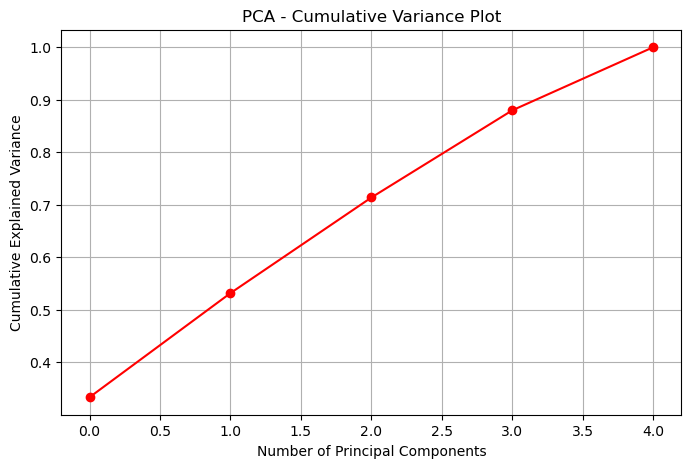

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o', color='red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Variance Plot')
plt.grid()
plt.show()


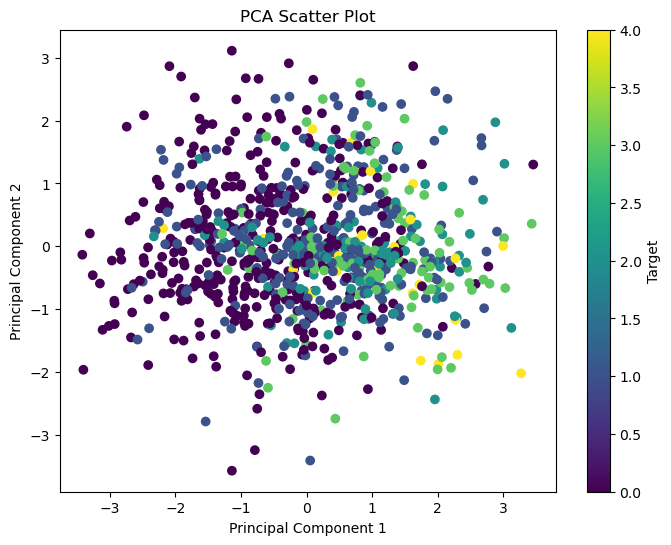

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['num'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Target')
plt.show()


In [10]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print(df_pca.head())
df_pca.to_csv("../data/pca_data.csv", index=False)


        PC1       PC2       PC3       PC4       PC5
0  1.416488 -0.093603  0.891074  1.199273  0.599793
1  2.688984  0.740525  0.743038 -0.572966 -0.300417
2  1.584665 -0.367449 -0.941313  1.408388  0.907383
3 -0.714845  0.752636  0.887336  3.613964 -0.624718
4 -1.361453 -0.461984  0.798594  1.399958 -0.235554
